In [1]:
import numpy as np
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
from random import shuffle
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

2021-08-12 15:40:01.735705: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-12 15:40:01.735869: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
os.listdir('brain_tumor_dataset')

['yes', 'no']

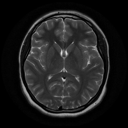

In [3]:
im =Image.open('brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

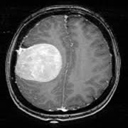

In [4]:
im =Image.open('brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [5]:
yes=os.listdir('brain_tumor_dataset/yes')
no=os.listdir('brain_tumor_dataset/no')

In [6]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [7]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [8]:
len(data_target)==len(data)

True

In [9]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
data

array(['Y252.jpg', 'Y109.JPG', 'Y78.jpg', 'Y2.jpg', 'Y253.JPG',
       'Y186.jpg', 'Y16.JPG', 'Y154.jpg', 'Y91.jpg', 'Y92.jpg', 'Y19.JPG',
       'Y247.JPG', 'Y112.JPG', 'Y90.jpg', 'Y60.jpg', 'Y184.JPG',
       'Y73.jpg', 'Y164.JPG', 'Y117.JPG', 'Y20.jpg', 'Y115.JPG',
       'Y40.JPG', 'Y66.JPG', 'Y21.jpg', 'Y26.jpg', 'Y258.JPG', 'Y102.jpg',
       'Y243.JPG', 'Y56.jpg', 'Y113.JPG', 'Y33.jpg', 'Y51.jpg', 'Y47.JPG',
       'Y24.jpg', 'Y82.jpg', 'Y157.JPG', 'Y159.JPG', 'Y256.JPG',
       'Y62.jpg', 'Y18.JPG', 'Y183.jpg', 'Y158.JPG', 'Y42.jpg', 'Y32.jpg',
       'Y31.jpg', 'Y74.jpg', 'Y106.jpg', 'Y96.jpg', 'Y245.jpg', 'Y34.jpg',
       'Y36.JPG', 'Y162.jpg', 'Y259.JPG', 'Y92.png', 'Y17.jpg', 'Y13.jpg',
       'Y116.JPG', 'Y29.jpg', 'Y166.JPG', 'Y114.JPG', 'Y98.JPG', 'Y7.jpg',
       'Y105.jpg', 'Y153.jpg', 'Y49.JPG', 'Y101.jpg', 'Y182.JPG',
       'Y167.JPG', 'Y103.jpg', 'Y120.JPG', 'Y23.JPG', 'Y195.JPG',
       'Y251.JPG', 'Y55.jpg', 'Y25.jpg', 'Y30.jpg', 'Y44.JPG', 'Y188.jpg',
       'Y

In [11]:
yes_values=os.listdir('brain_tumor_dataset/yes')
no_values=os.listdir('brain_tumor_dataset/no')

In [12]:
X_data =[]
for file in yes_values:
    img = cv2.imread('brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [13]:
for file in no_values:
    img = cv2.imread('brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [14]:
len(X_data)==len(data)==len(data_target)

True

In [15]:
X = np.squeeze(X_data)

In [16]:
X.shape

(253, 32, 32, 3)

In [17]:
# normalize data
X = X.astype('float32')
X /= 255

In [18]:
categorical_labels = to_categorical(data_target, num_classes=2)

In [19]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [21]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))MaxPooling2DMaxPooling2D

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

2021-08-12 15:40:48.430364: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-12 15:40:48.430402: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-12 15:40:48.430435: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (usama): /proc/driver/nvidia/version does not exist
2021-08-12 15:40:48.430750: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [23]:
history = model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

2021-08-12 15:41:44.486650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-12 15:41:44.511895: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2899885000 Hz


Epoch 1/150
2/2 [==============================] - 1s 324ms/step - loss: 0.6039 - acc: 0.7789 - val_loss: 1.1981 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 170ms/step - loss: 0.4712 - acc: 0.8158 - val_loss: 0.9485 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 167ms/step - loss: 0.4685 - acc: 0.8158 - val_loss: 1.2328 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 170ms/step - loss: 0.4520 - acc: 0.8158 - val_loss: 1.4652 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 182ms/step - loss: 0.4848 - acc: 0.8158 - val_loss: 1.1365 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 173ms/step - loss: 0.4446 - acc: 0.8158 - val_loss: 1.0416 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 1s 196ms/step - loss: 0.4488 - acc: 0.8158 - val_loss: 1.0651 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 0s 1

Epoch 124/150
2/2 [==============================] - 0s 191ms/step - loss: 0.0337 - acc: 0.9895 - val_loss: 1.9260 - val_acc: 0.6667
Epoch 125/150
2/2 [==============================] - 0s 196ms/step - loss: 0.0178 - acc: 1.0000 - val_loss: 1.5112 - val_acc: 0.7143
Epoch 126/150
2/2 [==============================] - 0s 205ms/step - loss: 0.0133 - acc: 1.0000 - val_loss: 1.3732 - val_acc: 0.7619
Epoch 127/150
2/2 [==============================] - 0s 204ms/step - loss: 0.0190 - acc: 1.0000 - val_loss: 1.5893 - val_acc: 0.7302
Epoch 128/150
2/2 [==============================] - 0s 194ms/step - loss: 0.0152 - acc: 0.9947 - val_loss: 2.0385 - val_acc: 0.6508
Epoch 129/150
2/2 [==============================] - 0s 209ms/step - loss: 0.0346 - acc: 0.9842 - val_loss: 2.1979 - val_acc: 0.6508
Epoch 130/150
2/2 [==============================] - 0s 192ms/step - loss: 0.0083 - acc: 1.0000 - val_loss: 2.0614 - val_acc: 0.6667
Epoch 131/150
2/2 [==============================] - 0s 184ms/step - 

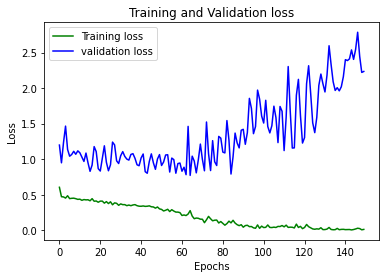

In [28]:
# Model loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,150)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

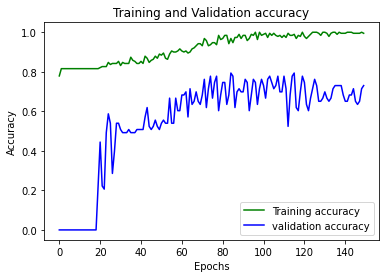

In [29]:
# Model accuracy
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(0,150)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

In [31]:
# Print test accuracy
print('\n', 'Test accuracy:', score[1] * 100)


 Test accuracy: 73.01587462425232


In [32]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

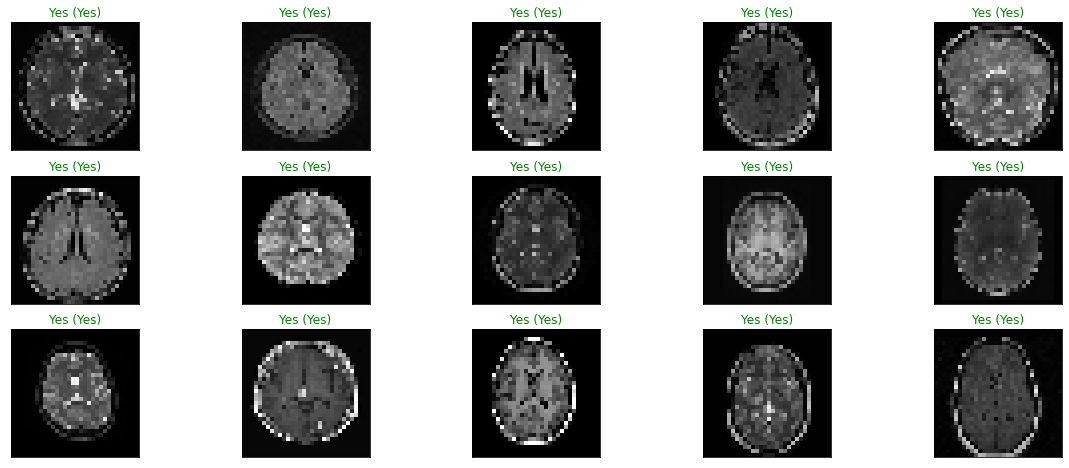

In [33]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
